#**SUBJECT 7: Detection of Microcalcification In Mammography** 



Imbalanced classification problems pose a challenge for predictive modelling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

•	Majority Class: More than half of the examples belong to this class, often the negative or normal case.

•	Minority Class: Less than half of the examples belong to this class, often the positive or abnormal case.

Prediction accuracy is the most common metric for classification tasks, although it is inappropriate and potentially dangerously misleading when used on imbalanced classification tasks. The reason for this is because if 98 percent of the data belongs to the negative class, you can achieve 98 percent accuracy on average by simply predicting the negative class all the time, achieving a score that naively looks good, but in practice has no skill. Instead, alternate performance metrics must be adopted. Popular alternatives are the precision and recall scores that allow the performance of the model to be considered by focusing on the minority class, called the positive class.


# **K-Nearest Neighbors (KNN)**

**K-Nearest Neighbors** is a supervised learning algorithm. Where the data is 'trained' with data points corresponding to their classification. To predict the class of a given data point, it takes into account the classes of the 'K' nearest data points and chooses the class in which the majority of the 'K' nearest data points belong to as the predicted class.


Here's an visualization of the K-Nearest Neighbors algorithm.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/images/KNN_Diagram.png">


In this sense, it is important to consider the value of k. Hopefully from this diagram, you should get a sense of what the K-Nearest Neighbors algorithm is. It considers the 'K' Nearest Neighbors (data points) when it predicts the classification of the test point.


In this case, we have data points of Class A and B. We want to predict what the star (test data point) is. If we consider a k value of 3 (3 nearest data points), we will obtain a prediction of Class B. Yet if we consider a k value of 6, we will obtain a prediction of Class A.


In [2]:
!pip install scikit-learn==0.23.1
!pip install imblearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit-learn-0.23.1.tar.gz (7.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn: filename=scikit_learn-0.23.1-cp39-cp39-linux_x86_64.whl size=24646950 sha256=6882ac68ed34cb627a63b8c7d308aef3edd59ca79c26adb013ab881e1fd6fa10
  Stored in directory: /root/.cache/pip/wheels/90/dc/33/9925b35a5a994256489b73bfb1672ee6ca87559dfdcc86226f
Successfully built scikit-learn
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but

Let's load required libraries


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline

### Load Data


Let's read the data using pandas library and print the first five rows.


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
path='/content/drive/MyDrive/mamo1.csv'
df = pd.read_csv(path)
df.head()

,area of object,average gray level,gradient strengh,root mean square noise,contrast,low order,class
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,0
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,0
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,0
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,0
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,0


### Data Visualization and Analysis


#### Let’s see how many of each class is in our data set


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area of object,11183.0,1.096536e-10,1.000000,-0.784415,-0.784415,-0.108577,0.313949,31.508443
average gray level,11183.0,1.297595e-09,1.000000,-0.470195,-0.470195,-0.394994,-0.076495,5.085849
gradient strengh,11183.0,5.698113e-10,1.000000,-0.591631,-0.591631,-0.230979,0.219837,29.477769
root mean square noise,11183.0,-2.435706e-09,1.000000,-0.859553,-0.859553,-0.859553,0.820208,9.591164
contrast,11183.0,-1.120680e-09,1.000000,-0.377866,-0.377866,-0.377866,-0.377866,23.617122
low order,11183.0,1.459483e-09,1.000000,-0.945723,-0.945723,-0.945723,1.016613,1.949027
class,11183.0,2.324958e-02,0.150702,0.000000,0.000000,0.000000,0.000000,1.000000


#### 10923 negative cas, 260 positive cas

In [9]:
df['class'].value_counts()

0    10923
1      260
Name: class, dtype: int64

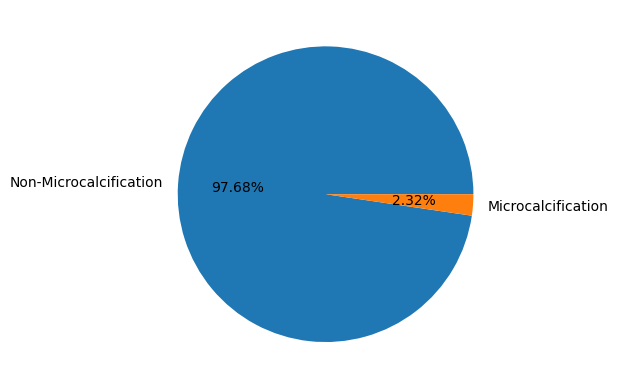

In [10]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['class']=encoder.fit_transform(df['class'])
x=df['class'].value_counts().to_list()
labels=['Non-Microcalcification','Microcalcification']

plt.pie(x,labels=labels,autopct='%1.2f%%',startangle=0);

<Axes: >

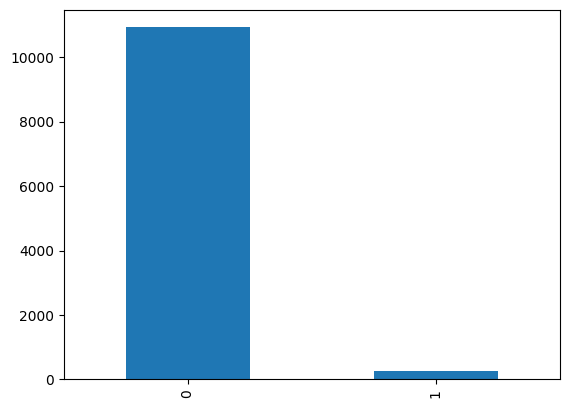

In [11]:
pd.value_counts(df['class']).plot.bar()

#### Feature set


Let's define feature sets, X:


In [12]:
df.columns

Index(['area of object', 'average gray level', 'gradient strengh',
       'root mean square noise', 'contrast', 'low order', 'class'],
      dtype='object')

To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:


In [16]:
X = df[['area of object', 'average gray level', 'gradient strengh',
       'root mean square noise', 'contrast', 'low order']].values  #.astype(float)
X[0:5]


array([[ 0.23001961,  5.0725783 , -0.27606055,  0.83244412, -0.37786573,
         0.4803223 ],
       [ 0.15549112, -0.16939038,  0.67065219, -0.85955255, -0.37786573,
        -0.94572324],
       [-0.78441482, -0.44365372,  5.6747053 , -0.85955255, -0.37786573,
        -0.94572324],
       [ 0.54608818,  0.13141457, -0.45638679, -0.85955255, -0.37786573,
        -0.94572324],
       [-0.10298725, -0.3949941 , -0.14081588,  0.97970269, -0.37786573,
         1.0135658 ]])

What are our labels?


In [17]:
y = df['class'].values
y[0:5]

array([0, 0, 0, 0, 0])

## Normalize Data


Data Standardization gives the data zero mean and unit variance, it is good practice, especially for algorithms such as KNN which is based on the distance of data points:


In [18]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.23002989,  5.07280511, -0.27607289,  0.83248134, -0.37788263,
         0.48034378],
       [ 0.15549807, -0.16939796,  0.67068217, -0.85959098, -0.37788263,
        -0.94576553],
       [-0.78444989, -0.44367356,  5.67495902, -0.85959098, -0.37788263,
        -0.94576553],
       [ 0.5461126 ,  0.13142044, -0.4564072 , -0.85959098, -0.37788263,
        -0.94576553],
       [-0.10299185, -0.39501176, -0.14082218,  0.9797465 , -0.37788263,
         1.01361112]])

## TRAIN TEST SPLIT

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (8946, 6) (8946,)
Test set: (2237, 6) (2237,)


##  k nearest neighbor (KNN)


#### Import library


Classifier implementing the k-nearest neighbors vote.


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.exceptions import NotFittedError

### Training




Let's start the algorithm with k=4 for now:

In [21]:
k = 1
knn = KNeighborsClassifier(n_neighbors=k)

In [22]:
from sklearn.model_selection import GridSearchCV

In [23]:
grid_params = { 'n_neighbors' : [1,2,3,5,7,9,11,13,21],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)    
g_res = gs.fit(X_train, y_train)
g_res.best_score_ 
g_res.best_params_

Fitting 3 folds for each of 54 candidates, totalling 162 fits


{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'distance'}

In [24]:
k = 1
#Train Model and Predict  
neigh = KNeighborsClassifier(metric= 'minkowski', n_neighbors= 1, weights= 'uniform').fit(X_train,y_train)
neigh

KNeighborsClassifier(n_neighbors=1)

### Predicting

In [28]:
yhat = neigh.predict(X_test)
yhat[0:5]


array([0, 0, 0, 0, 0])

### What about other K?

In multilabel classification, **accuracy classification score** is a function that computes subset accuracy. This function is equal to the jaccard_score function. Essentially, it calculates how closely the actual labels and predicted labels are matched in the test set.


K in KNN, is the number of nearest neighbors to examine. It is supposed to be specified by the user. So, how can we choose right value for K?
The general solution is to reserve a part of your data for testing the accuracy of the model. Then choose k =1, use the training part for modeling, and calculate the accuracy of prediction using all samples in your test set. Repeat this process, increasing the k, and see which k is the best for your model.

We can calculate the accuracy of KNN for different values of k.


In [29]:
from sklearn import metrics
Ks = 100
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.98435405, 0.98569513, 0.98614215, 0.98480107, 0.98569513,
       0.98390702, 0.98435405, 0.98167188, 0.98301296, 0.98077783,
       0.98167188, 0.9803308 , 0.97988377, 0.98077783, 0.98122485,
       0.9803308 , 0.98167188, 0.98077783, 0.98122485, 0.98077783,
       0.98077783, 0.98167188, 0.98122485, 0.98077783, 0.98167188,
       0.98211891, 0.98211891, 0.98167188, 0.98122485, 0.98122485,
       0.98167188, 0.98167188, 0.98167188, 0.98167188, 0.98211891,
       0.98211891, 0.98256594, 0.98211891, 0.98211891, 0.98211891,
       0.98211891, 0.98211891, 0.98211891, 0.98211891, 0.98167188,
       0.98167188, 0.98167188, 0.98167188, 0.98167188, 0.98122485,
       0.98167188, 0.98167188, 0.98167188, 0.98122485, 0.98122485,
       0.98122485, 0.98167188, 0.98122485, 0.98167188, 0.98122485,
       0.98167188, 0.98122485, 0.98122485, 0.98122485, 0.98122485,
       0.98167188, 0.98167188, 0.98167188, 0.98167188, 0.98167188,
       0.98167188, 0.98167188, 0.98122485, 0.98167188, 0.98122

#### Plot the model accuracy for a different number of neighbors.


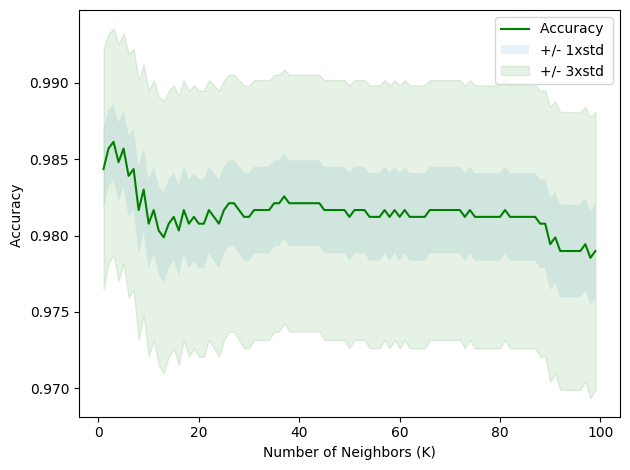

In [30]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [31]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.986142154671435 with k= 3


### Evaluation

**The F1 score**: is a single number that shows how well a binary classification model works. It considers both false positives and false negatives, and ranges from 0 to 1. A higher value means better performance.

**AUC**: The AUC, or "Area Under the Curve", is a metric that measures how well a binary classification model can distinguish between positive and negative classes. It represents the area under the receiver operating characteristic (ROC) curve, which shows the trade-off between sensitivity and specificity at different threshold levels. A higher AUC value indicates better model performance in distinguishing between the two classes.

**Recall**: (also known as sensitivity) is the proportion of true positive cases out of all actual positive cases. It shows how well the model is identifying positive cases, and a high recall score means that the model is detecting most of the positive cases.

**Precision**: is the proportion of true positive cases out of all predicted positive cases. It shows how well the model is predicting positive cases, and a high precision score means that most of the predicted positive cases are actually true positive cases.

**AP**: is a number that measures the quality of a binary classifier by looking at both precision and recall. It takes into account how well the model identifies both positive and negative instances.

**The G-mean**: is a number that shows how well a binary classification model performs by considering both sensitivity and specificity. It is especially useful when there is an imbalance between positive and negative instances.

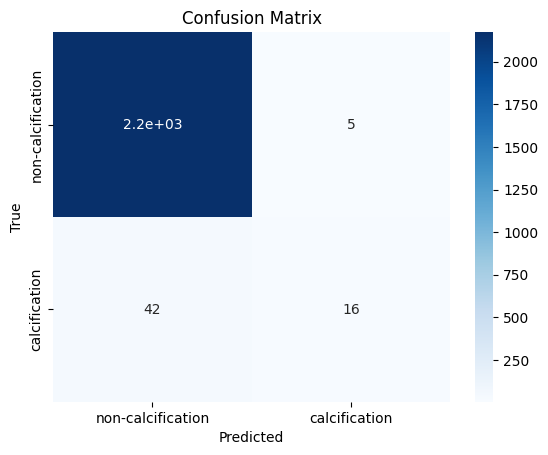

f1_score is: 0.9741580283141991
AUC is: 0.6367837192005191


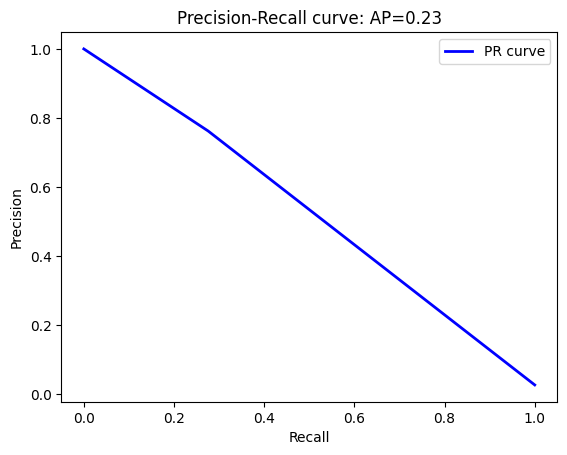

The G-mean is: 0.5246227858475921


In [32]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, yhat)  
#Plotting the confusion matrix
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['non-calcification','calcification'], yticklabels=['non-calcification','calcification'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#f1_score
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') #weighting the score of each class by its support (which is the number of true instances of that class)
print('f1_score is:', f1_score(y_test, yhat, average='weighted'))

#AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, yhat, labels=['non-calcification', 'calcification'])
print("AUC is:", auc)

#AP
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(y_test, yhat)
ap = average_precision_score(y_test, yhat)

# plot the precision-recall curve
plt.plot(recall, precision, color='blue', lw=2, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(ap))
plt.legend()
plt.show()

#G_mean
from sklearn.metrics import confusion_matrix

def g_mean(y_test, yhat):
    tn, fp, fn, tp = confusion_matrix(y_test, yhat).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    g_mean = (sensitivity * specificity) ** 0.5
    return g_mean
print("The G-mean is:", g_mean(y_test, yhat))



The model k-nearest neighbor has an accuracy score of 1 in this case, which typically means that our model has correctly classified all of the instances in the dataset it was evaluated on. And it's due to the highly imbalanced datas et: If the dataset is highly imbalanced, with one class significantly more prevalent than the others, a model may achieve a high accuracy by simply predicting the majority class all the time. 

In addition, we can't use cost sensitive with KNN: cost-sensitive learning is not recommended for k-NN,the algorithm does not explicitly learn a model from the training data. Instead, it makes predictions based on the similarity between the input instance and the training examples. Therefore, it is difficult to incorporate the cost matrix directly into the k-NN algorithm.

Let's try another method to solve this problem : **Over-sampling** using random sampling . To do so, we use the imblearn library. The code is given below :

In [33]:
from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler(random_state=0)
X_train_resampled,Y_train_resampled=ros.fit_resample(X_train,y_train)

Let's visualize the class data now:

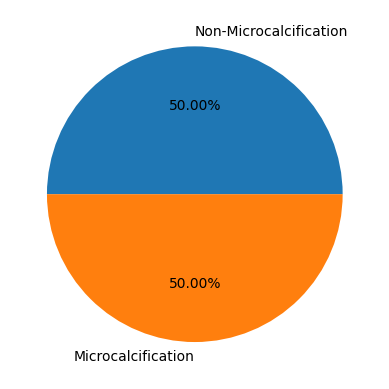

In [34]:
x=pd.DataFrame(Y_train_resampled).value_counts().to_list()
labels=['Non-Microcalcification','Microcalcification']

plt.pie(x,labels=labels,autopct='%1.2f%%',startangle=0);

As we notice now , the two classes are equal. Now we draw our confusion Matrix .

In [35]:
classifier= KNeighborsClassifier(n_neighbors = 3)  
classifier.fit(X_train_resampled, Y_train_resampled)
Y_pred= classifier.predict(X_test)

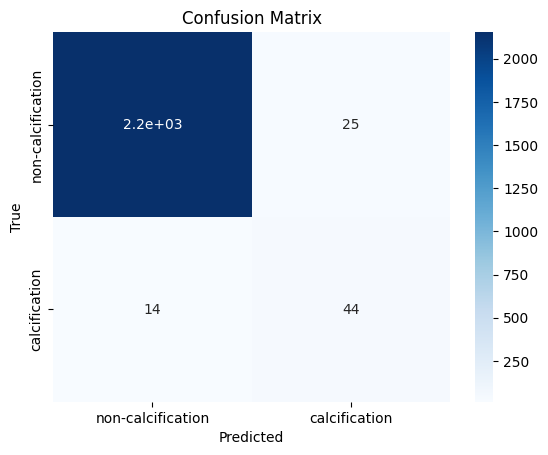

In [36]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, Y_pred) 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['non-calcification','calcification'], yticklabels=['non-calcification','calcification'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

After using the oversampling method, we can notice that the the correct predictions increased.

# **Random Forest Algorithm**

 Random Forest is a popular machine learning algorithm that belongs to the supervised learning technique. It can be used for both Classification and Regression problems in ML. It is based on the concept of **ensemble learning**, which is a process of combining multiple classifiers to solve a complex problem and to improve the performance of the model.

As the name suggests, **"Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset."** Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

** greater number of trees in the forest leads to higher accuracy and prevents the problem of overfitting.**

The below diagram explains the working of the Random Forest algorithm:


  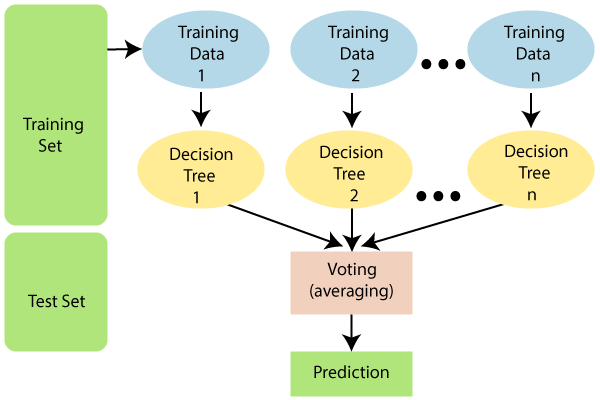

  



In [37]:
!pip install scikit-learn==0.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.1-cp39-cp39-linux_x86_64.whl
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.10.1 requires scikit-learn>=1.0.2, but you have scikit-learn 0.23.1 which is incompatible.


In [38]:
pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.23.1
    Uninstalling scikit-learn-0.23.1:
      Successfully uninstalled scikit-learn-0.23.1


Let's import the required libraries:

In [39]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline  
#allows plots to be displayed directly in the notebook rather than in a separate window


## Load the mammography data



In this project, we will use a standard imbalanced machine learning dataset referred to as Woods Mammography. 
A total of 6 features have been used, as follows:

•	Area of object.

•	Average gray level of the object.

•	Gradient strength of the object’s perimeter pixels.

•	Root mean square noise fluctuation in the object.

•	Contrast.

•	A low order moment.




| Field name           | Description                 |
| -----------          | --------------------------- |
|Area of object        | An pixels           |
|Average gray level of the object               | Assign voxels to classes             |
| Gradient strength of the object’s perimeter pixels             | Various intensity level values   |
| Root mean square noise fluctuation in the object            | The absolute value of the square root of the mean squares.    |
| Contrast | Average gray level of the object minus the average of a two-pixel wide border surrounding the object.           |
| 	A low order moment         | Based on shape descriptor |

There are two classes, and the goal is to distinguish between microcalcifications and non-microcalcifications using the features:

•	Non-microcalcifications: negative case, or majority class.

•	Microcalcifications: positive case, or minority class



Let's read the data using pandas library and print the first five rows.




In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import pandas as pd
path='/content/drive/MyDrive/mamo2.csv'
df = pd.read_csv(path)
df.head()

,area of object,average gray level,gradient strengh,root mean square noise,contrast,low order,class
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,'-1'
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,'-1'
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,'-1'
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,'-1'
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,'-1'


In [42]:
df.shape


(11183, 7)

## Data visualization and analysis

Let's see how many cases there is in each class of our dataset.

In [43]:
df['class'].value_counts()

'-1'    10923
'1'       260
Name: class, dtype: int64

**Positive cases:** 260

**Negative cases**: 10923

Let's visualise this data. 

In [44]:
encoder=LabelEncoder()
df['class']=encoder.fit_transform(df['class'])

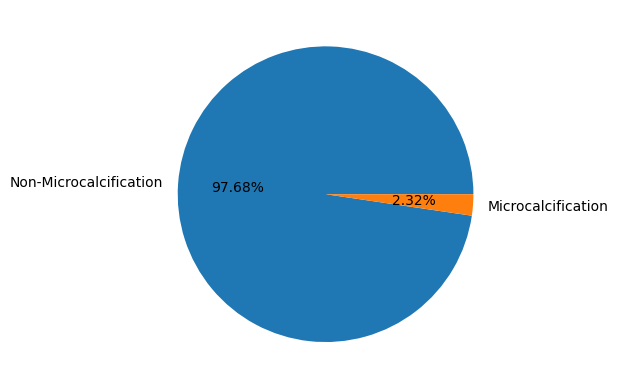

In [45]:
x=df['class'].value_counts().to_list()
labels=['Non-Microcalcification','Microcalcification']

plt.pie(x,labels=labels,autopct='%1.2f%%',startangle=0);

Now, let's visualize the relationships between the multiple variables in the dataset.

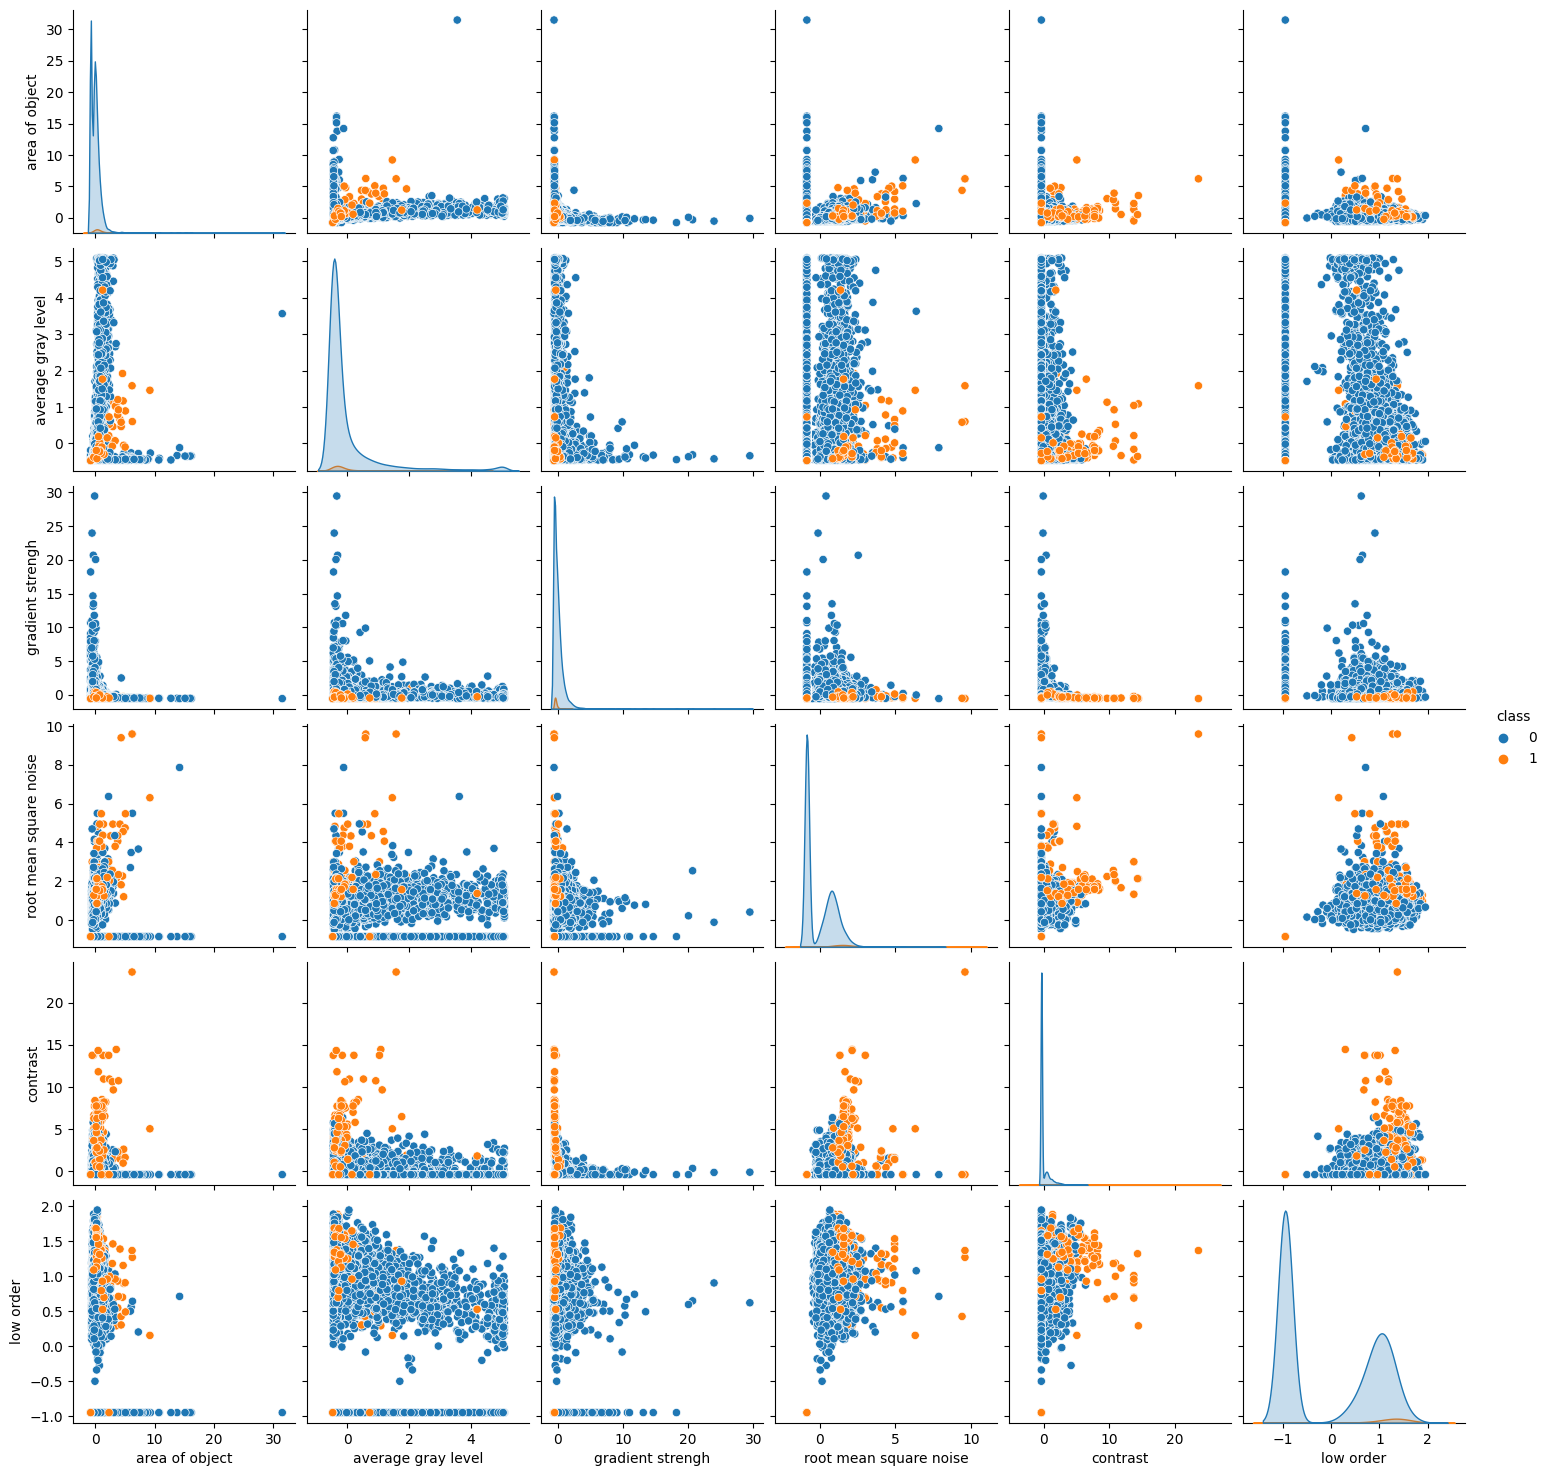

In [46]:
select=['area of object', 'average gray level', 'gradient strengh','root mean square noise', 'contrast', 'low order', 'class']

sns.pairplot(df[select],hue='class');

Now we will implement the Random Forest Algorithm tree using Python, following these steps: 



1.   Data Pre-processing step
2.   Fitting the Random Forest Algorithm to the training set
3.   Predicting the test result
4.   Test accuracy of the result ( Creation of Confusion Matrix)
5.   Visualizing the test set result









##1.Data Pre-Processing Step:

Below is the code for the pre-processing step:

In [47]:
#Seperating dependant and independant variables ( target and features)
import pandas as pd
X = df.iloc[:, :-1].values
print('X=', X)
Y = df.iloc[:, -1].values
print ('Y=', Y)


X= [[ 0.23001961  5.0725783  -0.27606055  0.83244412 -0.37786573  0.4803223 ]
 [ 0.15549112 -0.16939038  0.67065219 -0.85955255 -0.37786573 -0.94572324]
 [-0.78441482 -0.44365372  5.6747053  -0.85955255 -0.37786573 -0.94572324]
 ...
 [ 1.2049878   1.7637238  -0.50146835  1.5624078   6.4890725   0.93129397]
 [ 0.73664398 -0.22247361 -0.05065276  1.5096647   0.53926914  1.3152293 ]
 [ 0.17700275 -0.19150839 -0.50146835  1.5788636   7.750705    1.5559507 ]]
Y= [0 0 0 ... 1 1 1]


We split our dataset into train and test set:


In [48]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.20, random_state=0)  
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (8946, 6) (8946,)
Test set: (2237, 6) (2237,)


In [49]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler      
X_train= StandardScaler().fit_transform(X_train)    
X_test= StandardScaler().fit_transform(X_test)    

In the above code, we have pre-processed the data.

##2. Fitting the Random Forest algorithm to the training set:

Now we will fit the Random forest algorithm to the training set. To fit it, we will import the **RandomForestClassifier** class from the sklearn.**ensemble library**. The code is given below:

The classifier object takes below parameters:

**n_estimators**= The required number of trees in the Random Forest. The default value is 10. We can choose any number but need to take care of the overfitting issue.

**criterion**= It is a function to analyze the accuracy of the split. Here we have taken "entropy" for the information gain.

In [50]:
#Fitting Decision Tree classifier to the training set  
from sklearn.ensemble import RandomForestClassifier  
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")  
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

We can visualize one of the 10 decision trees (n_estimators= 10) by plotting it using plot_tree. The code is given below:

[Text(0.6302710843373494, 0.96875, 'x[3] <= 1.199\nentropy = 0.165\nsamples = 5625\nvalue = [8728, 218]'),
 Text(0.3795180722891566, 0.90625, 'x[3] <= 0.803\nentropy = 0.063\nsamples = 4944\nvalue = [7794, 58]'),
 Text(0.20481927710843373, 0.84375, 'x[1] <= -0.367\nentropy = 0.037\nsamples = 4226\nvalue = [6687, 26]'),
 Text(0.1144578313253012, 0.78125, 'x[2] <= -0.293\nentropy = 0.024\nsamples = 2726\nvalue = [4303, 10]'),
 Text(0.10240963855421686, 0.71875, 'x[5] <= 1.243\nentropy = 0.031\nsamples = 1953\nvalue = [3090, 10]'),
 Text(0.07228915662650602, 0.65625, 'x[0] <= 3.98\nentropy = 0.029\nsamples = 1939\nvalue = [3072, 9]'),
 Text(0.04819277108433735, 0.59375, 'x[3] <= -0.672\nentropy = 0.021\nsamples = 1897\nvalue = [3009, 6]'),
 Text(0.03614457831325301, 0.53125, 'x[0] <= -0.714\nentropy = 0.021\nsamples = 1860\nvalue = [2947, 6]'),
 Text(0.024096385542168676, 0.46875, 'x[1] <= -0.462\nentropy = 0.023\nsamples = 1689\nvalue = [2679, 6]'),
 Text(0.012048192771084338, 0.40625, '

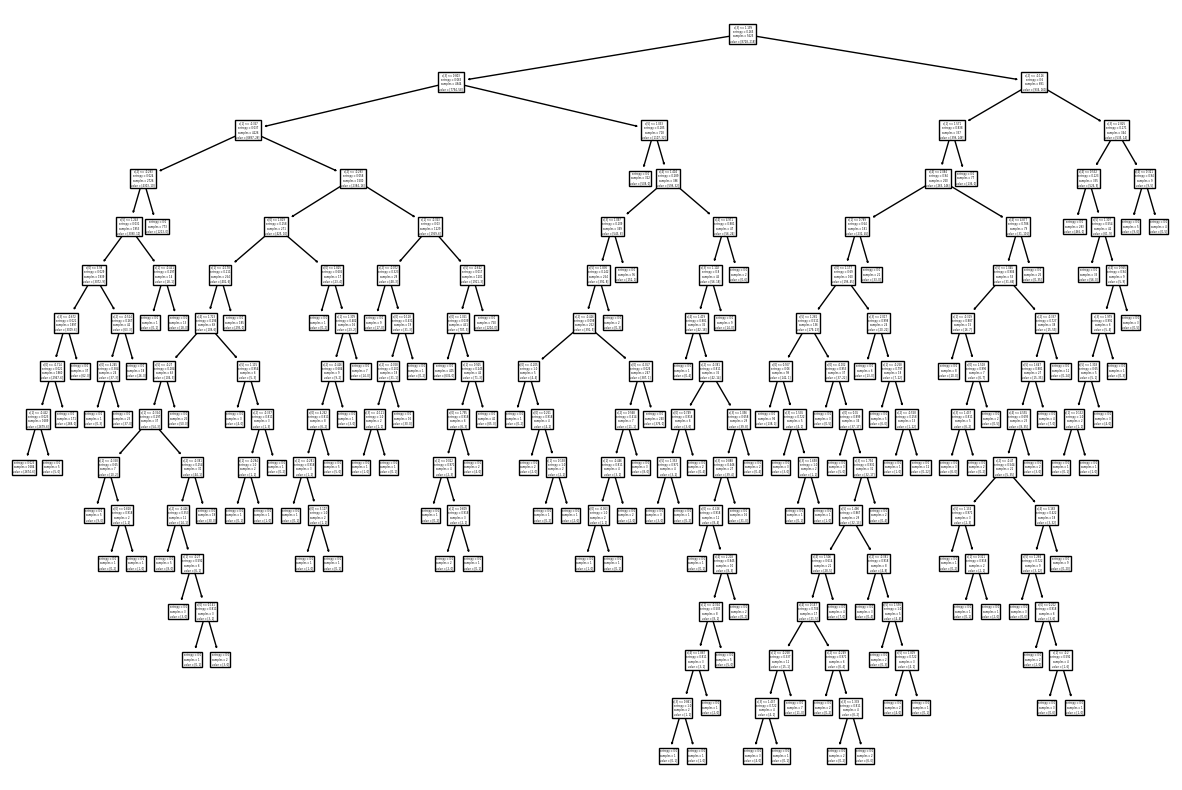

In [51]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))
plot_tree(classifier.estimators_[0]) #the first decision tree is accessed by index 0
          

The tree is too large to visualize it in one figure and make it readable.

Let’s check the depth of the first tree from the Random Forest:

In [52]:
classifier.estimators_[0].tree_.max_depth

15

Our first tree has max_depth=15. Other trees have similar depth. To make visualization readable it will be good to limit the depth of the tree.

In [60]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy", max_depth=3)
classifier.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', max_depth=3, n_estimators=10)

[Text(0.5, 0.875, 'x[4] <= 3.005\nentropy = 0.166\nsamples = 5624\nvalue = [8726, 220]'),
 Text(0.25, 0.625, 'x[4] <= 1.276\nentropy = 0.102\nsamples = 5523\nvalue = [8671, 117]'),
 Text(0.125, 0.375, 'x[0] <= 1.072\nentropy = 0.064\nsamples = 5200\nvalue = [8203, 62]'),
 Text(0.0625, 0.125, 'entropy = 0.041\nsamples = 4807\nvalue = [7638, 34]'),
 Text(0.1875, 0.125, 'entropy = 0.274\nsamples = 393\nvalue = [565, 28]'),
 Text(0.375, 0.375, 'x[5] <= 1.38\nentropy = 0.485\nsamples = 323\nvalue = [468, 55]'),
 Text(0.3125, 0.125, 'entropy = 0.288\nsamples = 284\nvalue = [433, 23]'),
 Text(0.4375, 0.125, 'entropy = 0.999\nsamples = 39\nvalue = [35, 32]'),
 Text(0.75, 0.625, 'x[3] <= 1.533\nentropy = 0.932\nsamples = 101\nvalue = [55, 103]'),
 Text(0.625, 0.375, 'x[5] <= 0.893\nentropy = 0.91\nsamples = 52\nvalue = [54, 26]'),
 Text(0.5625, 0.125, 'entropy = 0.0\nsamples = 13\nvalue = [16, 0]'),
 Text(0.6875, 0.125, 'entropy = 0.974\nsamples = 39\nvalue = [38, 26]'),
 Text(0.875, 0.375, 'x[

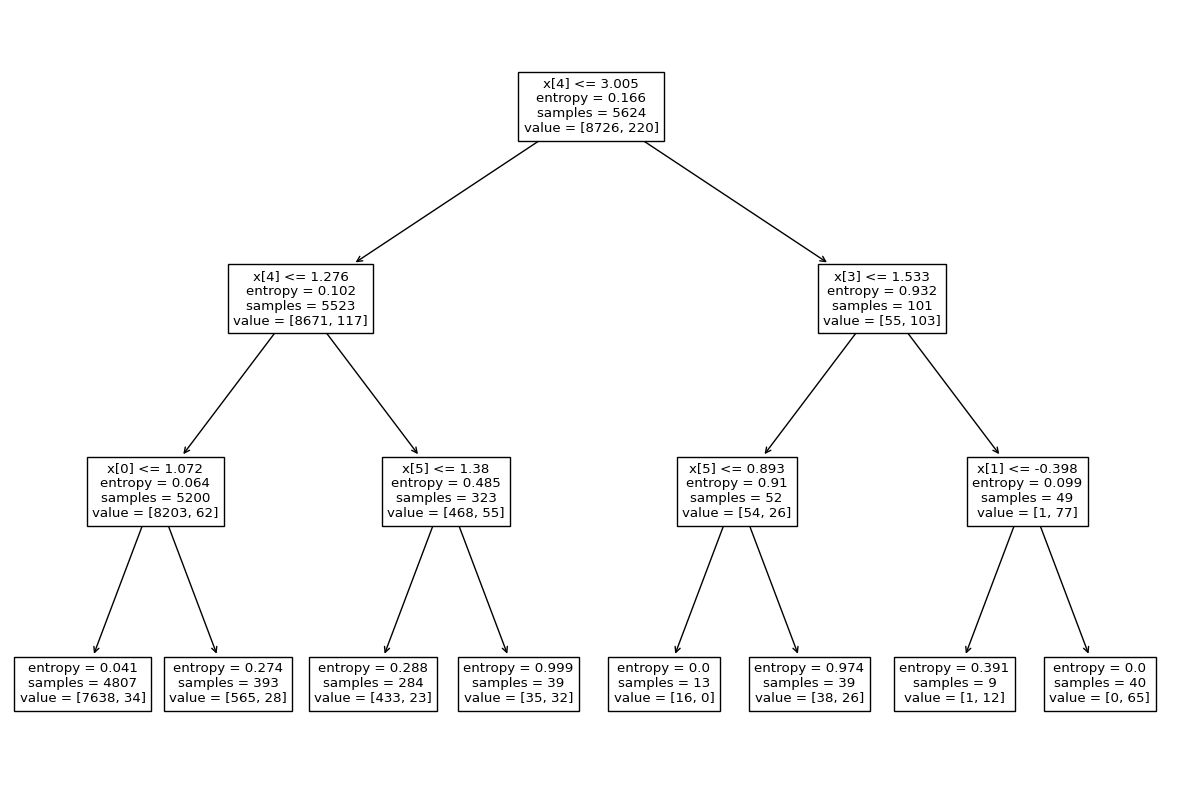

In [54]:
fig = plt.figure(figsize=(15, 10))
plot_tree(classifier.estimators_[0])

##3. Predicting the Test Set result

Since our model is fitted to the training set, so now we can predict the test result. For prediction, we will create a new prediction vector Y_pred. Below is the code for it:

In [55]:
#Predicting the test set result  
Y_pred= classifier.predict(X_test) 
print (Y_pred[:5]) #first 5 predicted values

[0 0 0 0 0]


After getting the Y_pred vector, we can compare the result of Y_pred and Y_test to check the difference:

In [61]:
print (Y_test[:5])

[0 1 0 0 0]


##4. Creating the Confusion Matrix


Now we will create **the confusion matrix** to determine the correct and incorrect predictions. Below is the code for it:

In [62]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, Y_pred)  

Let's plot the **Confusion Matrix**:

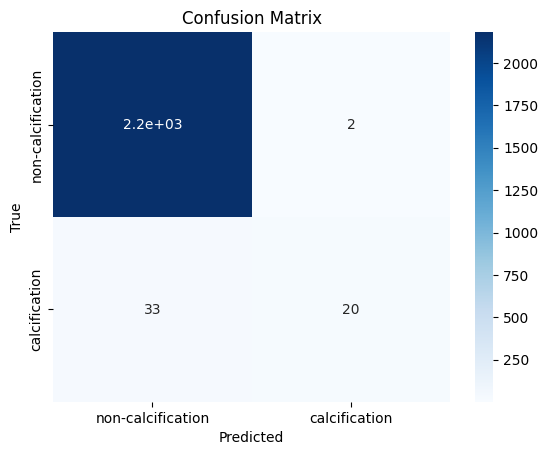

In [66]:
  
#Plotting the confusion matrix
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['non-calcification','calcification'], yticklabels=['non-calcification','calcification'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

As we can see, there are 2.2e+03 + 20 **correct predictions** , and 2+33=35 **incorrect predictions**. 

Now, we notice that almost every non-calcification case is well predicted by our model, but the calcification cases aren't ( just 20 out of 53 case). This is due to the imbalanced dataset that we have. The minority class ( Calcification) isn't well predicted.

The performance of our model is mesured by many metrics . We will use in our case the following ones : **f1_score** , **AUC score** , **Average precision score** , **G-mean** .

Let's calculate the **f1\_score** from sklearn library:


In [67]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='weighted') #weighting the score of each class by its support (which is the number of true instances of that class)

0.9811756773130427

Let's try the **jaccard index for accuracy**:


In [64]:
from sklearn.metrics import jaccard_score
jaccard_score(Y_test, Y_pred, pos_label=1)

0.36363636363636365

In [65]:
jaccard_score(Y_test, Y_pred, pos_label=0)

0.984212900315742

From the accuracy index, we conclude that our model is accurate when it comes to predicting the negative cases, while it's not so accurate for predicting the calcification cases.

Let's try the **AUC score**:

In [68]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_pred, labels=['non-calcification', 'calcification'])
print("AUC:", auc)

AUC: 0.6882213698251434


Let's try the **average precision score**:

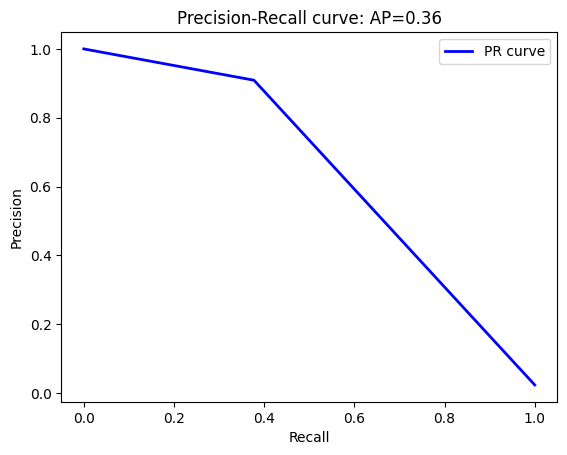

In [69]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
ap = average_precision_score(Y_test, Y_pred)

# plot the precision-recall curve
plt.plot(recall, precision, color='blue', lw=2, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(ap))
plt.legend()
plt.show()

Let's try the **G-mean**:

In [70]:
from sklearn.metrics import confusion_matrix

def g_mean(Y_test, Y_pred):
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    g_mean = (sensitivity * specificity) ** 0.5
    return g_mean

print("The G-mean :", g_mean(Y_test, Y_pred))

The G-mean : 0.6140137817530935


## Problem : Imbalanced Data

To solve the problem of the imbalanced data, we use the **Cost-Sensitive** method.

To code it, we add **class_weight="balanced"** to our classifier. 

In [71]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy",class_weight="balanced")  
classifier.fit(X_train, Y_train)
Y_pred= classifier.predict(X_test)

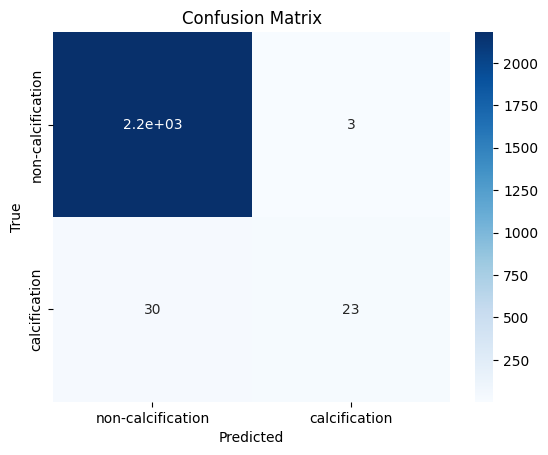

In [72]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, Y_pred) 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['non-calcification','calcification'], yticklabels=['non-calcification','calcification'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


As we see, the cost-sensitive method didn't give the wanted results. We should try another method to solve the problem of the imbalanced data.

## Evaluation

f1_score is: 0.9827725188562288
AUC is: 0.7162943188886586


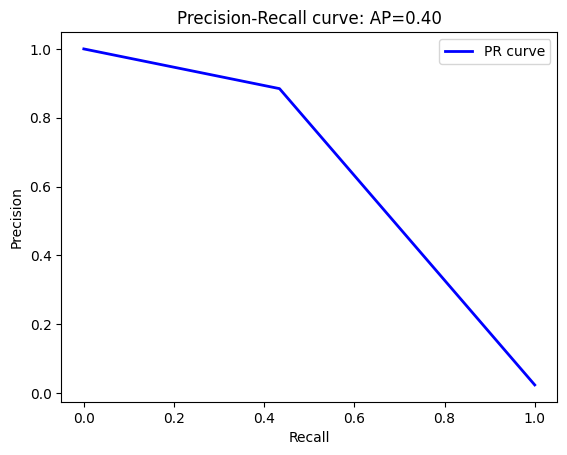

The G-mean is: 0.6583055234006069


In [74]:


#f1_score
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='weighted') #weighting the score of each class by its support (which is the number of true instances of that class)
print('f1_score is:', f1_score(Y_test, Y_pred, average='weighted'))

#AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_pred, labels=['non-calcification', 'calcification'])
print("AUC is:", auc)

#AP
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
ap = average_precision_score(Y_test, Y_pred)

# plot the precision-recall curve
plt.plot(recall, precision, color='blue', lw=2, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(ap))
plt.legend()
plt.show()

#G_mean
from sklearn.metrics import confusion_matrix

def g_mean(Y_test, Y_pred):
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    g_mean = (sensitivity * specificity) ** 0.5
    return g_mean
print("The G-mean is:", g_mean(Y_test, Y_pred))

# **Support Vector Machines (SVM)**

  The goal of the SVM algorithm is to create the best line or decision boundary that can segregate n-dimensional space into classes so that we can easily put the new data point in the correct category in the future. This best decision boundary is called a **hyperplane**.


  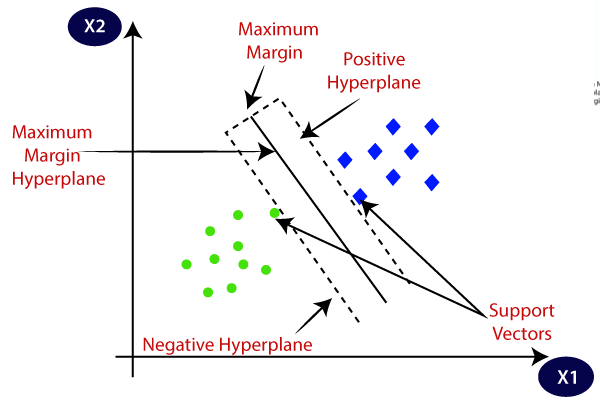

  There are two types of SVM based on the type of decision boundary they use to separate the classes: **linear SVM** and **non-linear SVM.** The main difference between linear and non-linear SVM is the decision boundary they use to separate the classes. Linear SVM uses a straight line or a hyperplane, while non-linear SVM uses a curved line or a curved hyperplane. Linear SVM works well when the data is linearly separable, while non-linear SVM is used when the data is not linearly separable.



In [75]:
!pip install scikit-learn==0.23.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-0.23.1-cp39-cp39-linux_x86_64.whl
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.23.1 which is incompatible.
imbalanced-learn 0.10.1 requires scikit-learn>=1.0.2, but you have scikit-learn 0.23.1 which is incompatible.


Let's import the required libraries:

In [76]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
%matplotlib inline 
#allows plots to be displayed directly in the notebook rather than in a separate window
import matplotlib.pyplot as plt

## Load the mammography data



In this project, we will use a standard imbalanced machine learning dataset referred to as Woods Mammography. 
A total of 6 features have been used, as follows:

•	Area of object.

•	Average gray level of the object.

•	Gradient strength of the object’s perimeter pixels.

•	Root mean square noise fluctuation in the object.

•	Contrast.

•	A low order moment.




| Field name           | Description                 |
| -----------          | --------------------------- |
|Area of object        | In pixels           |
|Average gray level of the object               | Assign voxels to classes             |
| Gradient strength of the object’s perimeter pixels             | Various intensity level values   |
| Root mean square noise fluctuation in the object            | The absolute value of the square root of the mean squares.    |
| Contrast | Average gray level of the object minus the average of a two-pixel wide border surrounding the object.           |
| 	A low order moment         | Based on shape descriptor |

There are two classes, and the goal is to distinguish between microcalcifications and non-microcalcifications using the features:

•	Non-microcalcifications: negative case, or majority class.

•	Microcalcifications: positive case, or minority class



Let's read the data using pandas library and print the first five rows.




In [77]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [78]:
import pandas as pd
path='/content/drive/MyDrive/mamo2.csv'
df = pd.read_csv(path)
df.head()

,area of object,average gray level,gradient strengh,root mean square noise,contrast,low order,class
0,0.230020,5.072578,-0.276061,0.832444,-0.377866,0.480322,'-1'
1,0.155491,-0.169390,0.670652,-0.859553,-0.377866,-0.945723,'-1'
2,-0.784415,-0.443654,5.674705,-0.859553,-0.377866,-0.945723,'-1'
3,0.546088,0.131415,-0.456387,-0.859553,-0.377866,-0.945723,'-1'
4,-0.102987,-0.394994,-0.140816,0.979703,-0.377866,1.013566,'-1'


In [79]:
from sklearn import preprocessing
encoder=preprocessing.LabelEncoder()
df['class']=encoder.fit_transform(df['class'])



In [80]:
df.shape

(11183, 7)

## Data visualization and analysis

Let's see how many cases there is in each class of our dataset.

In [81]:
df['class'].value_counts()

0    10923
1      260
Name: class, dtype: int64

**Positive cases:** 260

**Negative cases**: 10923

We can use a Kernel Density Estimation (KDE) Plot to visualize data. Let's first explore boxplots of the distribution using each feature in order to determine which feature is best for the KDE Plot.

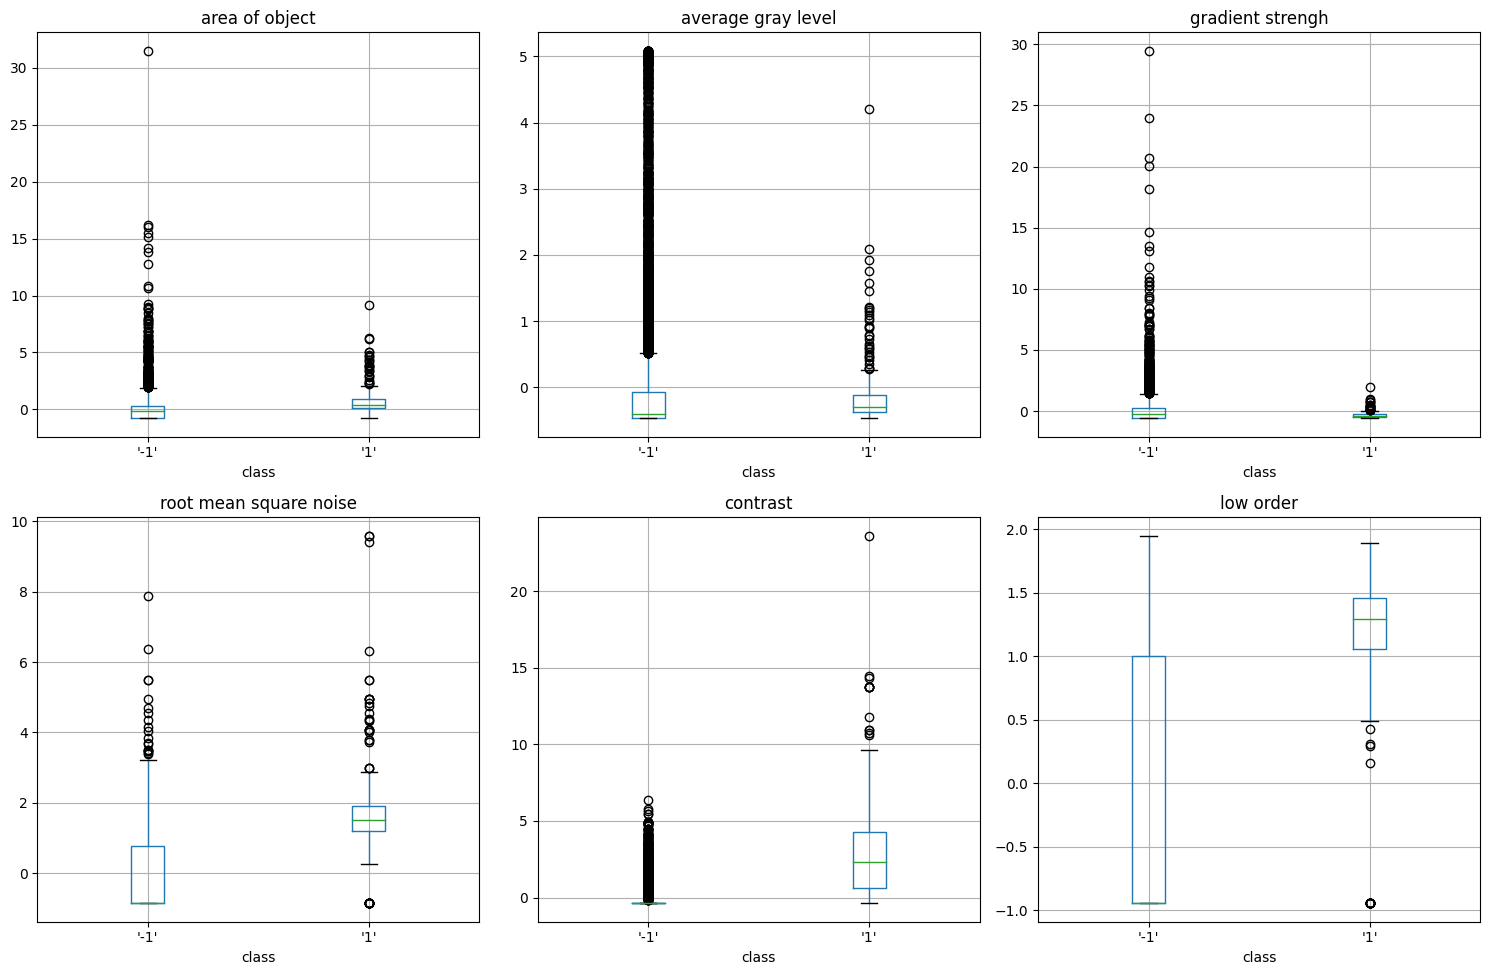

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/content/drive/MyDrive/suiiiiiii.csv')
#Create box plots for each feature
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs = axs.ravel()
for i, feature in enumerate(data.columns[:-1]):
    data.boxplot(column=feature, by='class', ax=axs[i])
    axs[i].set_title(feature)
plt.suptitle('')
plt.tight_layout()
plt.show()


The 'average gray level' feature's boxplot presents a considerable amount of outliers. It may be then interesting to explore the KDE plot using this feature.

<Axes: xlabel='average gray level', ylabel='Density'>

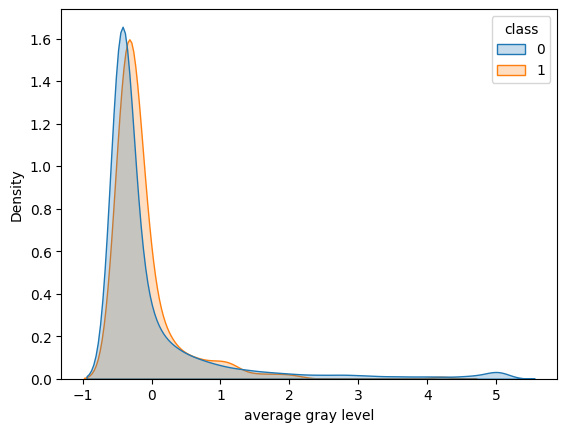

In [83]:
import seaborn as sns
sns.kdeplot(data=df, x='average gray level', hue='class', fill=True, common_norm=False)

## Seperating dependant and independant variables ( target and features)

In [84]:
import pandas as pd
X = df.iloc[:, :-1].values
print('X=', X)
Y = df.iloc[:, -1].values
print ('Y=', Y)

X= [[ 0.23001961  5.0725783  -0.27606055  0.83244412 -0.37786573  0.4803223 ]
 [ 0.15549112 -0.16939038  0.67065219 -0.85955255 -0.37786573 -0.94572324]
 [-0.78441482 -0.44365372  5.6747053  -0.85955255 -0.37786573 -0.94572324]
 ...
 [ 1.2049878   1.7637238  -0.50146835  1.5624078   6.4890725   0.93129397]
 [ 0.73664398 -0.22247361 -0.05065276  1.5096647   0.53926914  1.3152293 ]
 [ 0.17700275 -0.19150839 -0.50146835  1.5788636   7.750705    1.5559507 ]]
Y= [0 0 0 ... 1 1 1]


## Train/Test dataset


We split our dataset into train and test set:


In [85]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (8946, 6) (8946,)
Test set: (2237, 6) (2237,)


## Modeling (SVM)




The SVM algorithm offers a choice of kernel functions for performing its processing. Basically, mapping data into a higher dimensional space is called **kernelling**. The mathematical function used for the transformation is known as the kernel function, and can be of different types, such as:

```
1.Linear
2.Polynomial
3.Radial basis function (RBF)
4.Sigmoid
```

Each of these functions has its characteristics, its pros and cons, and its equation, but as there's no easy way of knowing which function performs best with any given dataset. We usually choose different functions in turn and compare the results. Let's just use the default, RBF (Radial Basis Function).


# 



























In [86]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', random_state=0)  
classifier.fit(X_train, Y_train)  

SVC(random_state=0)

After being fitted, the model can then be used to predict new values:


In [87]:
#Predicting the test set result  
Y_pred= classifier.predict(X_test)  
print (Y_pred[:5]) #first 5 predicted values

[0 0 0 0 0]


After getting the Y_pred vector, we can compare the result of Y_pred and Y_test to check the difference:

In [88]:
print (Y_test[:5])

[0 0 0 0 0]


## Evaluation

We are going to evaluate the performance of this classifier using 4 metrics that are the most adequate for an imbalanced dataset classification case:



1.   f1-score
2.   AUC score (AUC ROC)
3. Average precision score (AP)
4. G-Mean






Let's start by the **Confusion Matrix**:

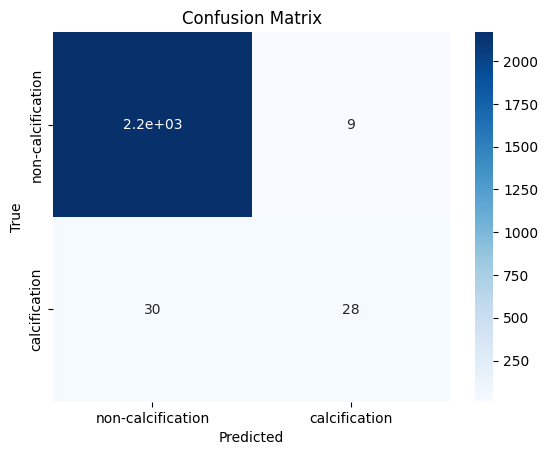

In [89]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, Y_pred)  
#Plotting the confusion matrix
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['non-calcification','calcification'], yticklabels=['non-calcification','calcification'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**f1\_score:** 




In [90]:
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='weighted') #weighting the score of each class by its support (which is the number of true instances of that class)

0.9806808172486536

**AUC score (AUC ROC):**

In [91]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_pred, labels=['non-calcification', 'calcification'])
print("AUC:", auc)

AUC: 0.7393141428367964


**Average precision score (AP):**

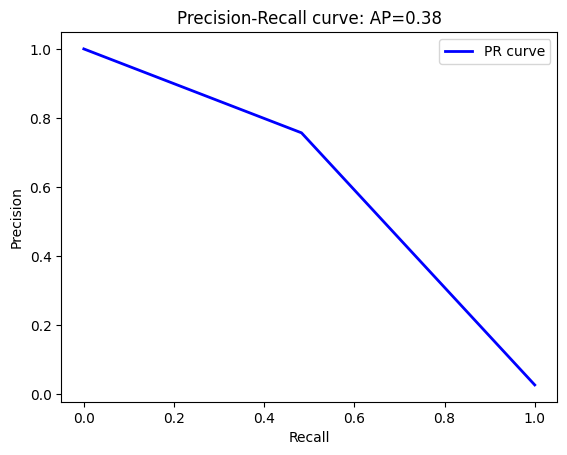

In [92]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
ap = average_precision_score(Y_test, Y_pred)

# plot the precision-recall curve
plt.plot(recall, precision, color='blue', lw=2, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(ap))
plt.legend()
plt.show()


**G-Mean:**

In [93]:
from sklearn.metrics import confusion_matrix

def g_mean(Y_test, Y_pred):
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    g_mean = (sensitivity * specificity) ** 0.5
    return g_mean
print("The G-mean :", g_mean(Y_test, Y_pred))


The G-mean : 0.6933719534667628


## Fitting the SVM classifier to the training set, **with the optimal value of C:** 

Let's find the optimal value of C. C tells us how much misclassification we want to avoid.

In [105]:
pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [106]:
pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 42.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.


In [112]:
from sklearn import datasets, svm, model_selection

# Define a range of values for C to search over
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create an SVM classifier with a linear kernel
svc = svm.SVC(kernel='rbf')

# Grid search the C parameter using 5-fold cross-validation
grid_search = model_selection.GridSearchCV(svc, param_grid, cv=5)
grid_search.fit(X_train, Y_train)

# Get the best value of C
best_c = grid_search.best_params_['C']

# Fit the final SVM model using the best value of C and the entire training set
final_svc = svm.SVC(kernel='rbf', C=best_c)
final_svc.fit(X_train, Y_train)

# Evaluate the performance of the final SVM model on a testing set
test_accuracy = final_svc.score(X_test, Y_test)

print('Optimal C is:', best_c)


ImportError: ignored

In [113]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', C=10, random_state=0)  
classifier.fit(X_train, Y_train)  
#Predicting the test set result  
Y_pred= classifier.predict(X_test)  
print (Y_pred[:5]) #first 5 predicted values
print (Y_test[:5])


[0 0 0 0 0]
[0 0 0 0 0]


## Evaluation:

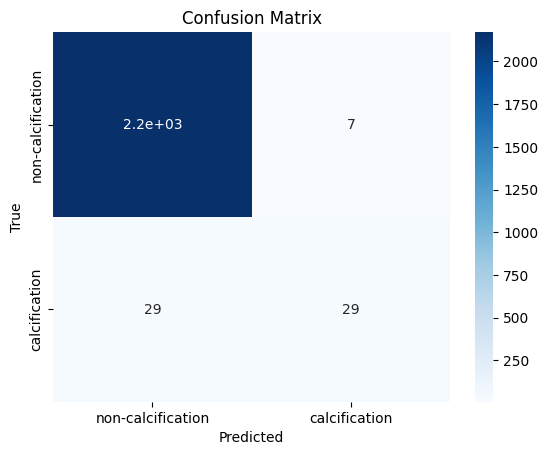

f1_score is: 0.9820642132326587
AUC is: 0.7483937586048647


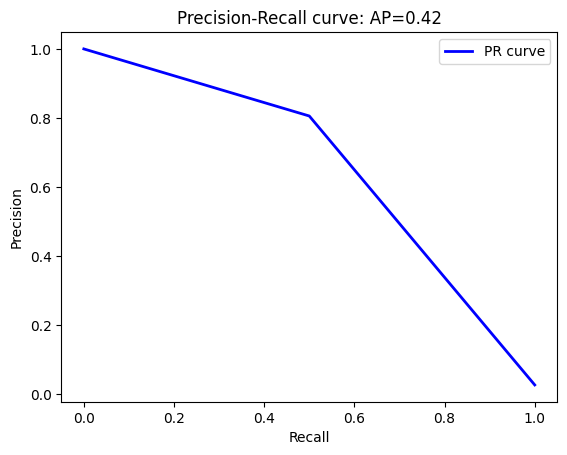

The G-mean is: 0.7059700833639232


In [96]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, Y_pred)  
#Plotting the confusion matrix
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['non-calcification','calcification'], yticklabels=['non-calcification','calcification'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

#f1_score
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='weighted') #weighting the score of each class by its support (which is the number of true instances of that class)
print('f1_score is:', f1_score(Y_test, Y_pred, average='weighted'))

#AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_pred, labels=['non-calcification', 'calcification'])
print("AUC is:", auc)

#AP
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
ap = average_precision_score(Y_test, Y_pred)

# plot the precision-recall curve
plt.plot(recall, precision, color='blue', lw=2, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(ap))
plt.legend()
plt.show()

#G_mean
from sklearn.metrics import confusion_matrix

def g_mean(Y_test, Y_pred):
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    g_mean = (sensitivity * specificity) ** 0.5
    return g_mean
print("The G-mean is:", g_mean(Y_test, Y_pred))


## Imbalanced data: the cost-sensitive

Misclassifying one class could, in some cases, have substantially more severe repercussions than misclassifying the other class. For instance, misclassifying a patient as healthy when they are actually ill may have much more serious repercussions than a false positive in a medical diagnosis application (misclassifying a patient as sick when they are actually healthy). Such asymmetric costs can be managed through cost-sensitive learning, which does so by allocating various costs to various kinds of misclassifications.

To code it, we add **class_weight="balanced"** to our classifier.

In [97]:
from sklearn.svm import SVC # "Support vector classifier"  
classifier = SVC(kernel='rbf', C=10, random_state=0, class_weight='balanced')  
classifier.fit(X_train, Y_train)  
#Predicting the test set result  
Y_pred= classifier.predict(X_test)  
print (Y_pred[:5]) #first 5 predicted values
print (Y_test[:5])


[0 0 0 0 0]
[0 0 0 0 0]


Let's plot the confusion matrix:

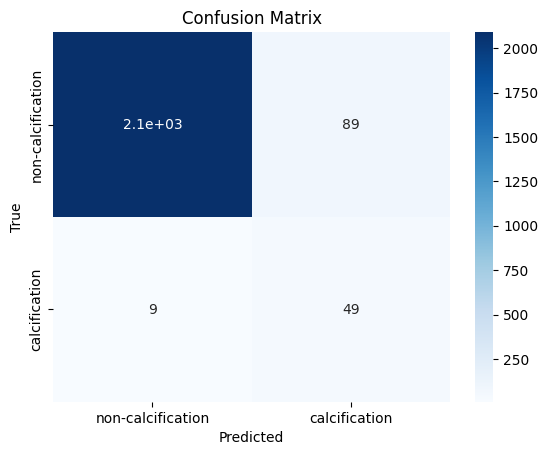

In [98]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(Y_test, Y_pred)  
#Plotting the confusion matrix
import seaborn as sns 
import matplotlib.pyplot as plt
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=['non-calcification','calcification'], yticklabels=['non-calcification','calcification'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

As we see, the cost-sensitive method gave better results already, the number of FN (false negative) cases has decreased. 

Let's now use the metrics below:

f1_score is: 0.96472225478966
AUC is: 0.9019915810795841


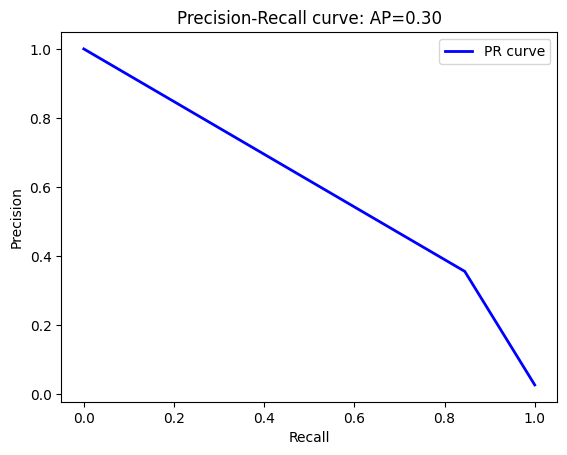

The G-mean is: 0.9001783656746274


In [99]:
#f1_score
from sklearn.metrics import f1_score
f1_score(Y_test, Y_pred, average='weighted') #weighting the score of each class by its support (which is the number of true instances of that class)
print('f1_score is:', f1_score(Y_test, Y_pred, average='weighted'))

#AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(Y_test, Y_pred, labels=['non-calcification', 'calcification'])
print("AUC is:", auc)

#AP
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, thresholds = precision_recall_curve(Y_test, Y_pred)
ap = average_precision_score(Y_test, Y_pred)

# plot the precision-recall curve
plt.plot(recall, precision, color='blue', lw=2, label='PR curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(ap))
plt.legend()
plt.show()

#G_mean
from sklearn.metrics import confusion_matrix

def g_mean(Y_test, Y_pred):
    tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred).ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    g_mean = (sensitivity * specificity) ** 0.5
    return g_mean
print("The G-mean is:", g_mean(Y_test, Y_pred))